In [1]:
# Isabella Sturm
# 2022-01-17
# Super Bowl Analysis
# Web scrape nfl.com to get team stats for data analysis
# Scrape data from pro-football-reference.com for additional statistics

In [3]:
# Import libraries for web scraping
import pandas as pd

### NFL Data

In [3]:
# Set up starting URL information
# URL = www.nfl.com/stats/team-stats/[type]/[stat]/[year]/reg/all
url_prefix = 'https://www.nfl.com/stats/team-stats/'
url_suffix = '/reg/all'
team_types = ['offense', 'defense', 'special-teams']
off_stats = ['passing', 'rushing', 'receiving', 'scoring', 'downs']
def_stats = off_stats + ['tackles', 'fumbles', 'interceptions']
st_stats = ['field-goals', 'scoring', 'kickoffs', 'punting', 'punt-returns']



In [4]:
# Get all the data from 1970 through 2021
nfl_df = pd.DataFrame()
for year in range(1970,2022):
    curr_year_df = pd.DataFrame()
    # Loop through the different team types and stat types and add to DF
    for team in team_types:
        if team == 'offense':
            for stat in off_stats:
                url = url_prefix + team +'/'+ stat +'/'+ str(year) + url_suffix
                df = pd.read_html(url)[0]
                df = df.add_prefix('off_'+stat+'_')
                if curr_year_df.empty:
                    curr_year_df = df
                else:
                    df.drop('off_'+stat+'_'+'Team', axis=1)
                    curr_year_df = pd.concat([curr_year_df, df], axis=1)
        elif team == 'defense':
            for stat in def_stats:
                url = url_prefix + team +'/'+ stat +'/'+ str(year) + url_suffix
                df = pd.read_html(url)[0]
                df = df.add_prefix('def_'+stat+'_')
                if curr_year_df.empty:
                    curr_year_df = df
                else:
                    df.drop('def_'+stat+'_'+'Team', axis=1)
                    curr_year_df = pd.concat([curr_year_df, df], axis=1)
        else: # special teams
            for stat in st_stats:
                url = url_prefix + team +'/'+ stat +'/'+ str(year) + url_suffix
                df = pd.read_html(url)[0]
                df = df.add_prefix('st_'+stat+'_')
                if curr_year_df.empty:
                    curr_year_df = df
                else:
                    df.drop('st_'+stat+'_'+'Team', axis=1)
                    curr_year_df = pd.concat([curr_year_df, df], axis=1)
                
    # Add current year to dataframe
    curr_year_df['Year'] = year
    # Append current year df to main nfl dataframe
    nfl_df = nfl_df.append(curr_year_df)
    

In [5]:
print(nfl_df.shape)

(1528, 178)


In [6]:
# Export data to csv for future (nfl years available changes yearly)
nfl_df.to_csv('nfl_stats_1970_2021.csv')

### Pro Football Reference Data

In [1]:
# Set up starting URL information
# URL = pro-football-reference.com/teams/[team]/[year]/gamelogs
url_prefix = 'https://www.pro-football-reference.com/teams/'
url_suffix = '.htm'
teams = {'buf': 'Bills','nwe': 'Patriots',
         'mia': 'Dolphins','nyj': 'Jets',
         'oti': 'Titans','clt': 'Colts',
         'htx': 'Texans','jax': 'Jaguars',
         'cin': 'Bengals','pit': 'Steelers',
         'cle': 'Browns','rav': 'Ravens',
         'kan': 'Chiefs','rai': 'Raiders',
         'sdg': 'Chargers','den': 'Broncos',
         'dal': 'Cowboys','phi': 'Eagles',
         'was': 'Football Team','nyg': 'Giants',
         'tam': 'Buccaneers','nor': 'Saints',
         'atl': 'Falcons','car': 'Panthers',
         'gnb': 'Packers','min': 'Vikings',
         'chi': 'Bears','det': 'Lions',
         'ram': 'Rams','crd': 'Cardinals',
         'sfo': '49ers','sea': 'Seahawks'}


In [4]:
# Get all the data from 1976 through 2021
pfr_df = pd.DataFrame()
for year in range(1976,2022):
    curr_year_df = pd.DataFrame()
    
    for team in teams:
        url = url_prefix + team +'/'+ str(year) + url_suffix
        # The first table is Team Stats and Rankings
        # Second is schedule and game results
        try:
            df = pd.read_html(url, header=1)[1]
            df['Team'] = teams[team]
            # Check if team was in the super bowl
            exists = 'SuperBowl' in df['Week']
            df['SuperBowl'] = exists
            # If the team was in Super Bowl, check if they won
            isWinner = False
            if exists:
                isWinner = 'W' in df[df['Week'] == 'SuperBowl']['Unnamed: 5']
            df['SuperBowlWinner'] = isWinner
            curr_year_df = curr_year_df.append(df)
        except:
            print('No data for team {} in year {}'.format(team, year))
        
    curr_year_df['Year'] = year
    pfr_df = pfr_df.append(curr_year_df)
    

No data for team htx in year 1976
No data for team jax in year 1976
No data for team rav in year 1976
No data for team car in year 1976
No data for team htx in year 1977
No data for team jax in year 1977
No data for team rav in year 1977
No data for team car in year 1977
No data for team htx in year 1978
No data for team jax in year 1978
No data for team rav in year 1978
No data for team car in year 1978
No data for team htx in year 1979
No data for team jax in year 1979
No data for team rav in year 1979
No data for team car in year 1979
No data for team htx in year 1980
No data for team jax in year 1980
No data for team rav in year 1980
No data for team car in year 1980
No data for team htx in year 1981
No data for team jax in year 1981
No data for team rav in year 1981
No data for team car in year 1981
No data for team htx in year 1982
No data for team jax in year 1982
No data for team rav in year 1982
No data for team car in year 1982
No data for team htx in year 1983
No data for te

In [5]:
print(pfr_df.shape)

(24362, 29)


In [6]:
pfr_df.head()

,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,...,PassY.1,RushY.1,TO.1,Team,SuperBowl,SuperBowlWinner,Year,Offense,Defense,Sp. Tms
0,1,Mon,September 13,9:00PM ET,boxscore,L,NaN,0-1,NaN,Miami Dolphins,...,197.0,204.0,3.0,Bills,False,False,1976,NaN,NaN,NaN
1,2,Sun,September 19,1:00PM ET,boxscore,L,NaN,0-2,NaN,Houston Oilers,...,52.0,208.0,1.0,Bills,False,False,1976,NaN,NaN,NaN
2,3,Sun,September 26,1:00PM ET,boxscore,W,NaN,1-2,@,Tampa Bay Buccaneers,...,168.0,170.0,2.0,Bills,False,False,1976,NaN,NaN,NaN
3,4,Sun,October 3,1:00PM ET,boxscore,W,NaN,2-2,NaN,Kansas City Chiefs,...,341.0,161.0,6.0,Bills,False,False,1976,NaN,NaN,NaN
4,5,Sun,October 10,1:00PM ET,boxscore,L,NaN,2-3,@,New York Jets,...,63.0,207.0,4.0,Bills,False,False,1976,NaN,NaN,NaN


In [7]:
pfr_df.tail()

,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,...,PassY.1,RushY.1,TO.1,Team,SuperBowl,SuperBowlWinner,Year,Offense,Defense,Sp. Tms
13,14,Sun,December 12,1:00PM ET,boxscore,W,NaN,5-8,@,Houston Texans,...,317.0,63.0,NaN,Seahawks,False,False,2021,21.71,2.60,-9.75
14,15,Tue,December 21,7:00PM ET,boxscore,L,NaN,5-9,@,Los Angeles Rams,...,209.0,123.0,1.0,Seahawks,False,False,2021,-8.13,-4.19,3.72
15,16,Sun,December 26,4:05PM ET,boxscore,L,NaN,5-10,NaN,Chicago Bears,...,229.0,88.0,NaN,Seahawks,False,False,2021,8.31,-7.60,-3.95
16,17,Sun,January 2,4:25PM ET,boxscore,W,NaN,6-10,NaN,Detroit Lions,...,262.0,95.0,3.0,Seahawks,False,False,2021,32.32,-3.55,-2.68
17,18,Sun,January 9,4:25PM ET,boxscore,W,NaN,7-10,@,Arizona Cardinals,...,187.0,118.0,1.0,Seahawks,False,False,2021,12.83,-0.21,-1.02


In [11]:
pfr_df['SuperBowl'].loc[pfr_df['Week'] == 'SuperBowl'] = True
pfr_df['SuperBowlWinner'].loc[(pfr_df['Unnamed: 5'] == 'W') & (pfr_df['Week'] == 'SuperBowl')] = True


In [12]:
pfr_df[pfr_df['SuperBowlWinner'] == True]

,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,...,PassY.1,RushY.1,TO.1,Team,SuperBowl,SuperBowlWinner,Year,Offense,Defense,Sp. Tms
17,SuperBowl,Sun,January 9,3:50PM ET,boxscore,W,NaN,16-1,N,Minnesota Vikings,...,282.0,71.0,3.0,Raiders,True,True,1976,NaN,NaN,NaN
17,SuperBowl,Sun,January 15,6:00PM ET,boxscore,W,NaN,15-2,N,Denver Broncos,...,35.0,121.0,8.0,Cowboys,True,True,1977,NaN,NaN,NaN
19,SuperBowl,Sun,January 21,4:00PM ET,boxscore,W,NaN,17-2,N,Dallas Cowboys,...,176.0,154.0,3.0,Steelers,True,True,1978,NaN,NaN,NaN
19,SuperBowl,Sun,January 20,6:00PM ET,boxscore,W,NaN,15-4,N,Los Angeles Rams,...,194.0,107.0,1.0,Steelers,True,True,1979,NaN,NaN,NaN
20,SuperBowl,Sun,January 25,6:00PM ET,boxscore,W,NaN,15-5,N,Philadelphia Eagles,...,291.0,69.0,4.0,Raiders,True,True,1980,NaN,NaN,NaN
19,SuperBowl,Sun,January 24,4:00PM ET,boxscore,W,NaN,16-3,N,Cincinnati Bengals,...,284.0,72.0,4.0,49ers,True,True,1981,NaN,NaN,NaN
13,SuperBowl,Sun,January 30,6:00PM ET,boxscore,W,NaN,12-1,N,Miami Dolphins,...,80.0,96.0,2.0,Football Team,True,True,1982,NaN,NaN,NaN
19,SuperBowl,Sun,January 22,4:50PM ET,boxscore,W,NaN,15-4,N,Washington Redskins,...,193.0,90.0,3.0,Raiders,True,True,1983,NaN,NaN,NaN
19,SuperBowl,Sun,January 20,6:00PM ET,boxscore,W,NaN,18-1,N,Miami Dolphins,...,289.0,25.0,2.0,49ers,True,True,1984,NaN,NaN,NaN
19,SuperBowl,Sun,January 26,5:00PM ET,boxscore,W,NaN,18-1,N,New England Patriots,...,116.0,7.0,6.0,Bears,True,True,1985,NaN,NaN,NaN


In [13]:
pfr_df[pfr_df['SuperBowl'] == True]

,Week,Day,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,OT,Rec,Unnamed: 8,Opp,...,PassY.1,RushY.1,TO.1,Team,SuperBowl,SuperBowlWinner,Year,Offense,Defense,Sp. Tms
17,SuperBowl,Sun,January 9,3:50PM ET,boxscore,W,NaN,16-1,N,Minnesota Vikings,...,282.0,71.0,3.0,Raiders,True,True,1976,NaN,NaN,NaN
17,SuperBowl,Sun,January 9,3:50PM ET,boxscore,L,NaN,13-3-1,N,Oakland Raiders,...,163.0,266.0,NaN,Vikings,True,False,1976,NaN,NaN,NaN
17,SuperBowl,Sun,January 15,6:00PM ET,boxscore,L,NaN,14-3,N,Dallas Cowboys,...,182.0,143.0,2.0,Broncos,True,False,1977,NaN,NaN,NaN
17,SuperBowl,Sun,January 15,6:00PM ET,boxscore,W,NaN,15-2,N,Denver Broncos,...,35.0,121.0,8.0,Cowboys,True,True,1977,NaN,NaN,NaN
19,SuperBowl,Sun,January 21,4:00PM ET,boxscore,W,NaN,17-2,N,Dallas Cowboys,...,176.0,154.0,3.0,Steelers,True,True,1978,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,SuperBowl,Sun,February 2,6:30PM ET,boxscore,L,NaN,15-4,N,Kansas City Chiefs,...,268.0,129.0,2.0,49ers,True,False,2019,5.19,-18.54,1.58
20,SuperBowl,Sun,February 7,6:30PM ET,boxscore,L,NaN,16-3,N,Tampa Bay Buccaneers,...,195.0,145.0,NaN,Chiefs,True,False,2020,-7.90,-10.75,-1.18
21,SuperBowl,Sun,February 7,6:30PM ET,boxscore,W,NaN,15-5,N,Kansas City Chiefs,...,243.0,107.0,2.0,Buccaneers,True,True,2020,10.75,7.90,1.18
22,SuperBowl,Sun,February 13,6:30PM ET,preview,NaN,NaN,NaN,N,Los Angeles Rams,...,NaN,NaN,NaN,Bengals,True,False,2021,NaN,NaN,NaN


In [14]:
# Export data to csv for future
pfr_df.to_csv('pfr_stats_1976_2021.csv')

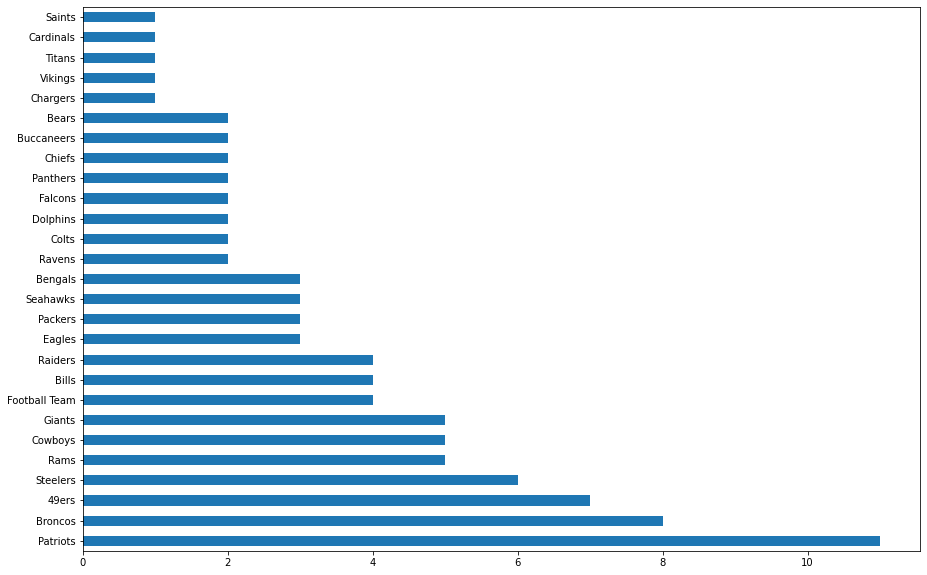

In [16]:
# Teams that have made it to the Superbowl
pfr_df[pfr_df['SuperBowl'] == 1]['Team'].value_counts().plot(kind='barh', figsize=(15,10))